In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
old_pop_path = "/Users/coreyhu/Downloads/county_population.csv"
old_pop_df = pd.read_csv(old_pop_path, encoding='latin-1')

old_pop_df = old_pop_df[(old_pop_df['areaname'] == old_pop_df['state_name']) & 
                ~(old_pop_df['state_name'].isin(['District of Columbia', 'United States']))]

old_pop_df = old_pop_df.drop(['fips', 'state_fips', 'base20104', 'pop19904', 'pop20104', 'county_fips','areaname', 'county_name', 'fipsst', 'fipsco', 'region', 'division' ], axis=1)
old_pop_df.set_index('state_name', inplace=True)
old_pop_df.rename(columns={"pop{}".format(i) : "{}".format(i) for i in range(1970, 2010)}, inplace=True)
old_pop_df.drop(old_pop_df.loc[:,old_pop_df.isnull().any()].columns, axis=1, inplace=True)
old_pop_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,3444354.0,3497000.0,3540000.0,3581000.0,3628000.0,3680000.0,3737000.0,3783000.0,3834000.0,3869000.0,...,4451849.0,4464034.0,4472420.0,4490591.0,4512190.0,4545049.0,4597688.0,4637904.0,4677464.0,4708708.0
Alaska,302583.0,316000.0,326000.0,333000.0,345000.0,371000.0,393000.0,397000.0,402000.0,403000.0,...,627499.0,633316.0,642691.0,650884.0,661569.0,669488.0,677325.0,682297.0,688125.0,698473.0
Arizona,1775399.0,1896000.0,2009000.0,2125000.0,2224000.0,2286000.0,2348000.0,2427000.0,2518000.0,2639000.0,...,5166697.0,5304417.0,5452108.0,5591206.0,5759425.0,5974834.0,6192100.0,6362241.0,6499377.0,6595778.0
Arkansas,1923322.0,1972000.0,2018000.0,2058000.0,2100000.0,2158000.0,2169000.0,2207000.0,2241000.0,2269000.0,...,2678288.0,2691068.0,2704732.0,2722291.0,2746161.0,2776221.0,2815097.0,2842194.0,2867764.0,2889450.0
California,19971071.0,20346000.0,20585000.0,20868000.0,21173000.0,21537000.0,21934000.0,22350000.0,22839000.0,23255000.0,...,33994571.0,34485623.0,34876194.0,35251107.0,35558419.0,35795255.0,35979208.0,36226122.0,36580371.0,36961664.0


In [18]:
new_pop_path = "/Users/coreyhu/Downloads/nst-est2018-popchg2010_2018.csv"
new_pop_df = pd.read_csv(new_pop_path)

new_pop_df = new_pop_df[(new_pop_df['STATE'] > 0) & ~(new_pop_df['NAME'].isin(['District of Columbia', 'Puerto Rico']))]
new_pop_df = new_pop_df[['NAME'] + ['POPESTIMATE{}'.format(i) for i in range(2010, 2019)]]

new_pop_df.rename(columns={"POPESTIMATE{}".format(i) : "{}".format(i) for i in range(2010, 2019)}, inplace=True)
new_pop_df.rename(columns={"NAME":"state_name"},inplace=True)
new_pop_df.set_index('state_name', inplace=True)
new_pop_df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
state_name,,,,,,,,,
Alabama,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
Alaska,713906,722038,730399,737045,736307,737547,741504,739786,737438
Arizona,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
Arkansas,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
California,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [19]:
pop_df = old_pop_df.merge(new_pop_df, on='state_name', suffixes=('', ''))
pop_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,3444354.0,3497000.0,3540000.0,3581000.0,3628000.0,3680000.0,3737000.0,3783000.0,3834000.0,3869000.0,...,4708708.0,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
Alaska,302583.0,316000.0,326000.0,333000.0,345000.0,371000.0,393000.0,397000.0,402000.0,403000.0,...,698473.0,713906,722038,730399,737045,736307,737547,741504,739786,737438
Arizona,1775399.0,1896000.0,2009000.0,2125000.0,2224000.0,2286000.0,2348000.0,2427000.0,2518000.0,2639000.0,...,6595778.0,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
Arkansas,1923322.0,1972000.0,2018000.0,2058000.0,2100000.0,2158000.0,2169000.0,2207000.0,2241000.0,2269000.0,...,2889450.0,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
California,19971071.0,20346000.0,20585000.0,20868000.0,21173000.0,21537000.0,21934000.0,22350000.0,22839000.0,23255000.0,...,36961664.0,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045
Colorado,2209596.0,2303000.0,2405000.0,2496000.0,2541000.0,2586000.0,2632000.0,2696000.0,2767000.0,2849000.0,...,5024748.0,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564
Connecticut,3032217.0,3061000.0,3070000.0,3069000.0,3076000.0,3085000.0,3086000.0,3089000.0,3095000.0,3100000.0,...,3518288.0,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665
Delaware,548104.0,565000.0,574000.0,579000.0,583000.0,589000.0,593000.0,595000.0,598000.0,599000.0,...,885122.0,899595,907316,915188,923638,932596,941413,949216,957078,967171
Florida,6791418.0,7163000.0,7520000.0,7927000.0,8317000.0,8542000.0,8695000.0,8889000.0,9132000.0,9471000.0,...,18537969.0,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325


In [20]:
pop_df.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018'],
      dtype='object')

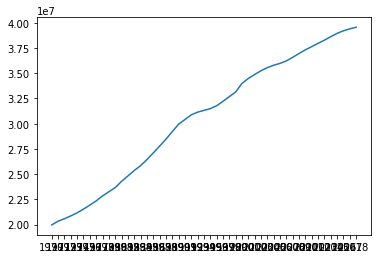

In [21]:
plt.plot(pop_df.loc['California'])

In [24]:
save_path = "./data/population_data.csv"
pop_df.to_csv(save_path, encoding='utf-8')